In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline

In [2]:
columns= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car.data', names=columns, header=0, sep=',')
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
dff=df

# Performing one hot encoding

In [3]:
dff = pd.get_dummies(dff, columns=['buying'])
dff = pd.get_dummies(dff, columns=['maint'])
dff = pd.get_dummies(dff, columns=['doors'])
dff = pd.get_dummies(dff, columns=['persons'])
dff = pd.get_dummies(dff, columns=['lug_boot'])
dff = pd.get_dummies(dff, columns=['safety'])

In [4]:
dff.head()

,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
1,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
2,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
4,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0


In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
for attribute in df.columns:
    print("{} ".format(attribute))
    print("{}".format(df[attribute].unique()),"\n")
    
print('Shape of dataset: {}'.format(df.shape))

buying 
['vhigh' 'high' 'med' 'low'] 

maint 
['vhigh' 'high' 'med' 'low'] 

doors 
['2' '3' '4' '5more'] 

persons 
['2' '4' 'more'] 

lug_boot 
['small' 'med' 'big'] 

safety 
['med' 'high' 'low'] 

class 
['unacc' 'acc' 'vgood' 'good'] 

Shape of dataset: (1727, 7)


# Visualizing the data using the graphs

Checking the percentages of the values in the class attribute

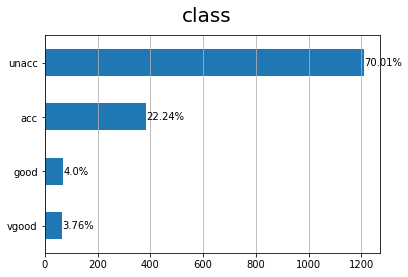

In [7]:
ax = df['class'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle('class', fontsize=20)
plt.show()

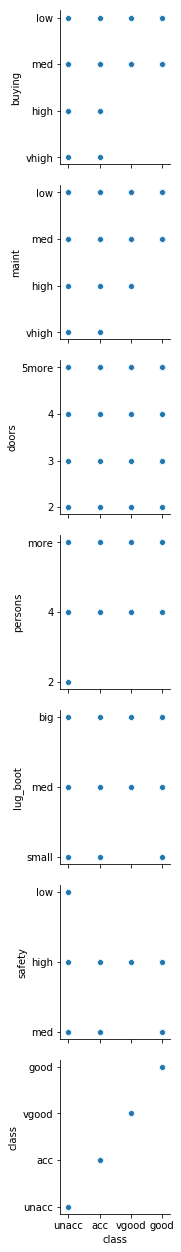

In [8]:
pp = sn.pairplot(data=df,
                  y_vars=columns,
                  x_vars=['class'])

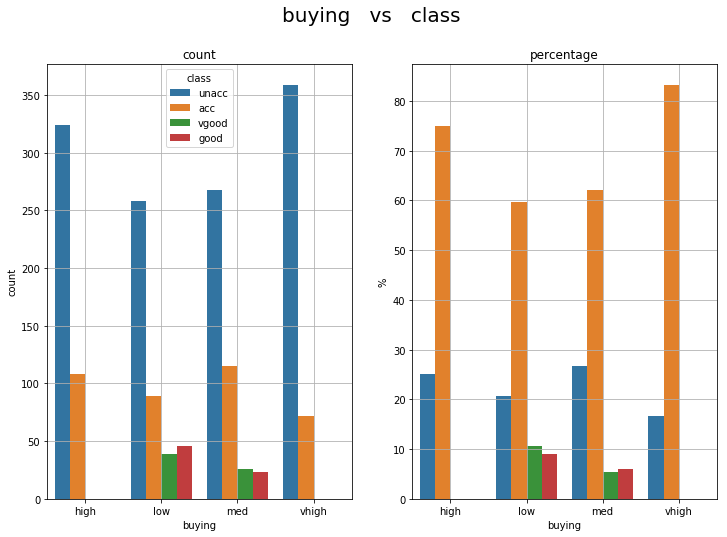

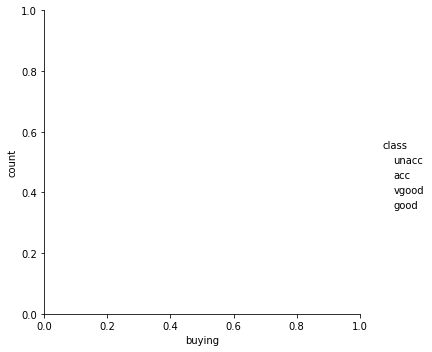

In [9]:
x, y = "buying", "class"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
fig.set_size_inches(12, 8)
### count
ax[0].title.set_text('count')

order = df.groupby(x)[y].count().index.tolist()
sn.catplot(x=x, hue=y, data=df, kind='count', order=order, ax=ax[0])
ax[0].grid(True)
### percentage
ax[1].title.set_text('percentage')
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = df.groupby([x,y])[y].count()
b = b.rename(columns={y:0}).reset_index()
b = b.merge(a, how="left")
b["%"] = b[0] / b["tot"] *100
sn.barplot(x=x, y="%", hue=y, data=b, ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()

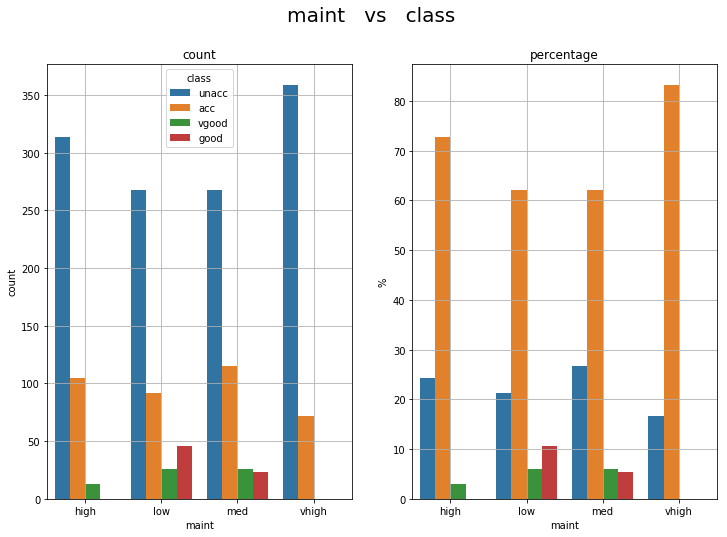

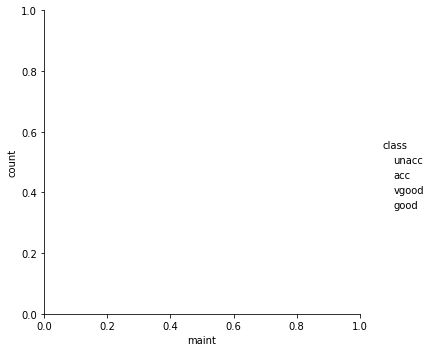

In [10]:
x, y = "maint", "class"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
fig.set_size_inches(12, 8)
### count
ax[0].title.set_text('count')

order = df.groupby(x)[y].count().index.tolist()
sn.catplot(x=x, hue=y, data=df, kind='count', order=order, ax=ax[0])
ax[0].grid(True)
### percentage
ax[1].title.set_text('percentage')
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = df.groupby([x,y])[y].count()
b = b.rename(columns={y:0}).reset_index()
b = b.merge(a, how="left")
b["%"] = b[0] / b["tot"] *100
sn.barplot(x=x, y="%", hue=y, data=b, ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()

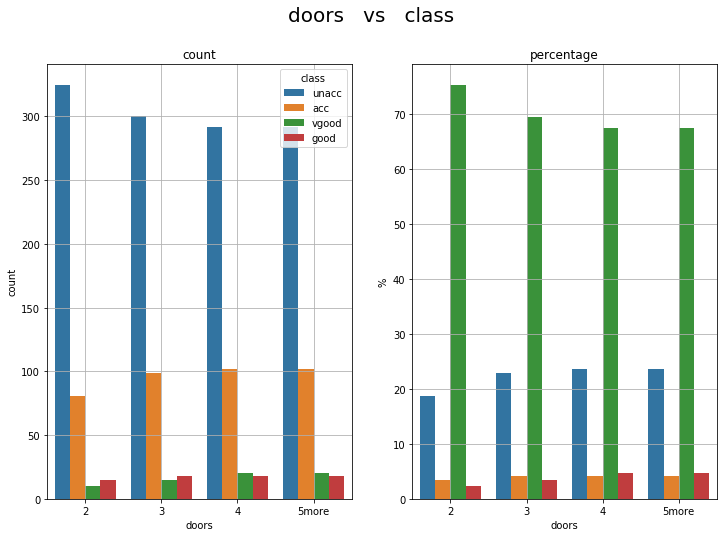

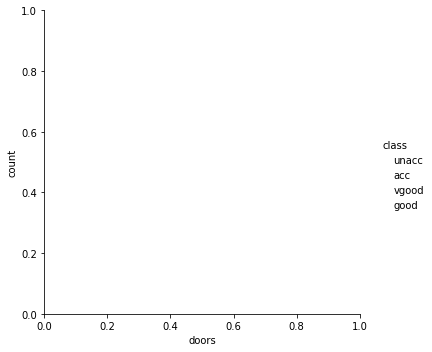

In [11]:
x, y = "doors", "class"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
fig.set_size_inches(12, 8)
### count
ax[0].title.set_text('count')

order = df.groupby(x)[y].count().index.tolist()
sn.catplot(x=x, hue=y, data=df, kind='count', order=order, ax=ax[0])
ax[0].grid(True)
### percentage
ax[1].title.set_text('percentage')
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = df.groupby([x,y])[y].count()
b = b.rename(columns={y:0}).reset_index()
b = b.merge(a, how="left")
b["%"] = b[0] / b["tot"] *100
sn.barplot(x=x, y="%", hue=y, data=b, ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()

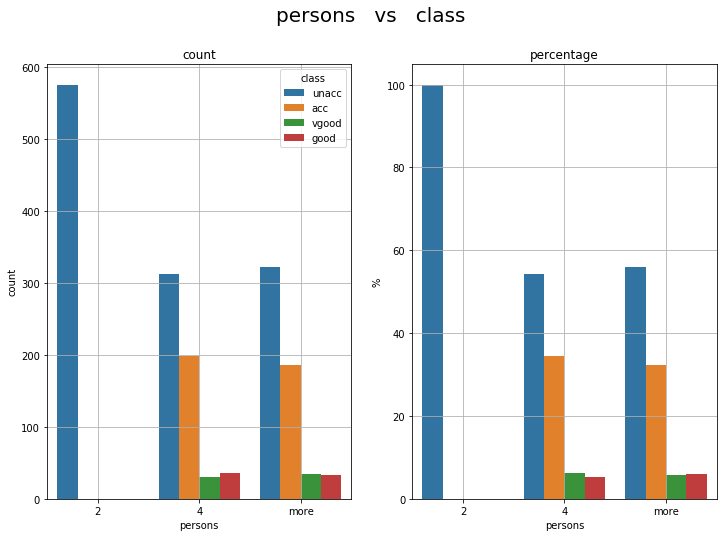

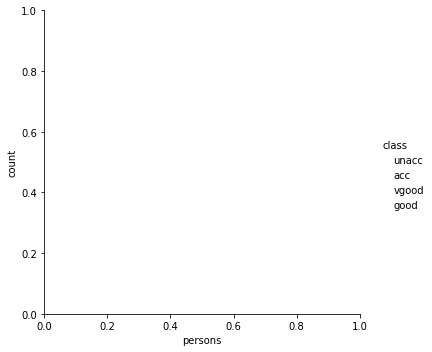

In [12]:
x, y = "persons", "class"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
fig.set_size_inches(12, 8)
### count
ax[0].title.set_text('count')

order = df.groupby(x)[y].count().index.tolist()
sn.catplot(x=x, hue=y, data=df, kind='count', order=order, ax=ax[0])
ax[0].grid(True)
### percentage
ax[1].title.set_text('percentage')
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = df.groupby([x,y])[y].count()
b = b.rename(columns={y:0}).reset_index()
b = b.merge(a, how="left")
b["%"] = b[0] / b["tot"] *100
sn.barplot(x=x, y="%", hue=y, data=b, ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()

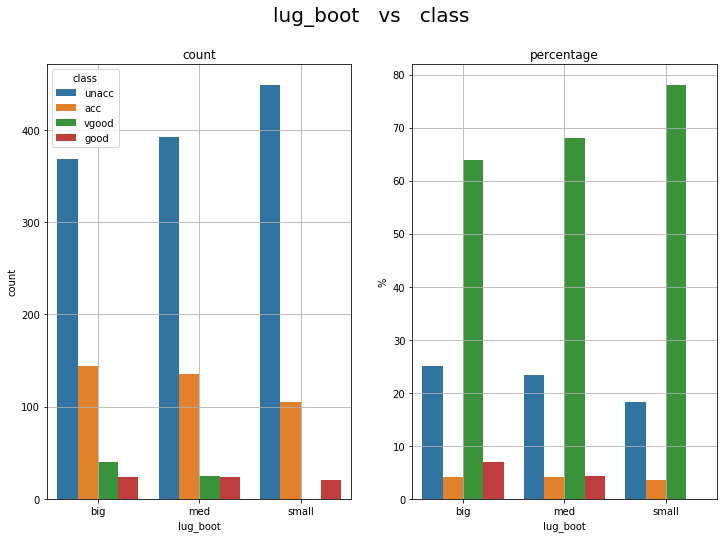

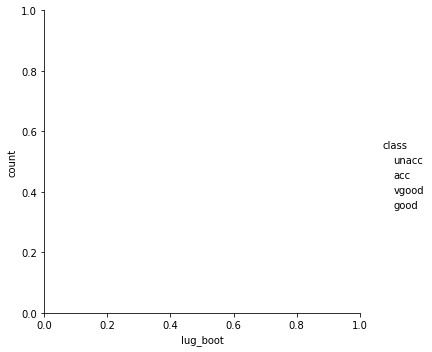

In [13]:
x, y = "lug_boot", "class"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
fig.set_size_inches(12, 8)
### count
ax[0].title.set_text('count')

order = df.groupby(x)[y].count().index.tolist()
sn.catplot(x=x, hue=y, data=df, kind='count', order=order, ax=ax[0])
ax[0].grid(True)
### percentage
ax[1].title.set_text('percentage')
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = df.groupby([x,y])[y].count()
b = b.rename(columns={y:0}).reset_index()
b = b.merge(a, how="left")
b["%"] = b[0] / b["tot"] *100
sn.barplot(x=x, y="%", hue=y, data=b, ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()

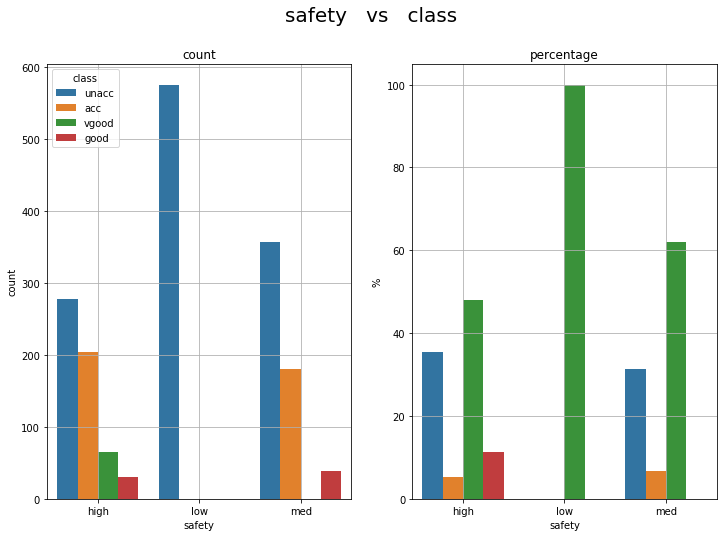

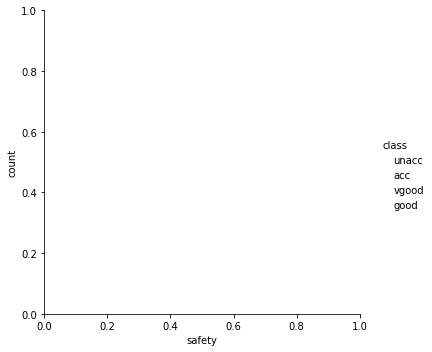

In [14]:
x, y = "safety", "class"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
fig.set_size_inches(12, 8)
### count
ax[0].title.set_text('count')

order = df.groupby(x)[y].count().index.tolist()
sn.catplot(x=x, hue=y, data=df, kind='count', order=order, ax=ax[0])
ax[0].grid(True)
### percentage
ax[1].title.set_text('percentage')
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = df.groupby([x,y])[y].count()
b = b.rename(columns={y:0}).reset_index()
b = b.merge(a, how="left")
b["%"] = b[0] / b["tot"] *100
sn.barplot(x=x, y="%", hue=y, data=b, ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()

# Correlation between the attributes

Text(0.5, 1.0, 'pearson correlation')

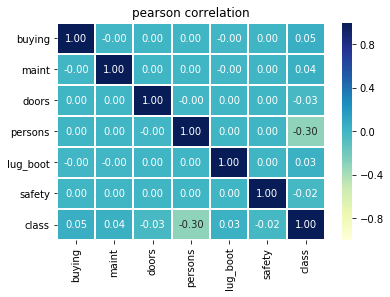

In [15]:
corr_matrix = df.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sn.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=1)
plt.title("pearson correlation")


# Splitting the data into training and test set

In [16]:
X = np.array(dff.drop(['class'], 1))
Y = np.array(dff['class'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# 10-Fold cross validation

In [17]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
accuracy_logistic = []

In [18]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Training the model

In [19]:
clf = LogisticRegression(solver='liblinear',multi_class='ovr')
for train_index, test_index in folds.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],Y[train_index], Y[test_index]    
    accuracy_logistic.append(get_score(clf, X_train, X_test, y_train, y_test))  


# Accuracy score

In [20]:
accuracy_logistic

[0.764367816091954,
 0.6954022988505747,
 0.7758620689655172,
 0.7758620689655172,
 0.8092485549132948,
 0.7906976744186046,
 0.877906976744186,
 0.872093023255814,
 0.8953488372093024,
 0.8294117647058824]

In [21]:
print("The accuracy of the mode is",sum(accuracy_logistic)/10)

The accuracy of the mode is 0.8086201084120648


# Confusion matrix

In [22]:
y_pred = clf.predict(X_test) 
confusion_matrix(y_pred,y_test)

array([[ 14,   0,   0,   0],
       [ 20,   6,   4,   1],
       [  4,   0, 116,   0],
       [  0,   0,   0,   5]], dtype=int64)

# Predicting the given data set

In [23]:
clf.predict([[0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1]])

array(['unacc'], dtype=object)

In [24]:
print("class label of a car with attributes : buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med] is: unacc")

class label of a car with attributes : buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med] is: unacc
